In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('PowerPlant.csv')

In [3]:
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [4]:
df.shape

(9568, 5)

In [9]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [11]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [13]:
X=df.drop(labels='PE',axis=1)
Y=df[['PE']]

In [15]:
X

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:

ss=StandardScaler()

In [19]:
X = pd.DataFrame(ss.fit_transform(X), columns=['AT', 'V', 'AP', 'RH'])


In [20]:
out = []

for i in X.columns:
    a = X[(X[i] < -3) | (X[i] > 3)].index
    out.extend(a)
    print(f"Column: {i}, Outliers: {len(a)} rows")


Column: AT, Outliers: 0 rows
Column: V, Outliers: 0 rows
Column: AP, Outliers: 51 rows
Column: RH, Outliers: 7 rows


In [25]:
outliers=list(set(out))
len(outliers)

58

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [31]:
xtrain.shape

(7654, 4)

In [33]:
xtest.shape

(1914, 4)

In [35]:
!pip install keras
!pip install tensorflow


In [36]:
from keras.models import Sequential
from keras.layers import Input, Dense


In [38]:
model = Sequential()
model.add(Input(shape=(xtrain.shape[1],)))


In [39]:
model.add(Dense(units=64,activation='relu'))


In [40]:
model.add(Dense(units=32,activation='relu'))


In [46]:
model.add(Dense(units=1,activation='linear'))

In [48]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])


In [50]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 186881.3125 - mae: 431.1599 - val_loss: 134447.1250 - val_mae: 365.3719
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56704.2969 - mae: 211.5419 - val_loss: 18119.1328 - val_mae: 114.4121
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13296.1689 - mae: 96.9061 - val_loss: 8997.9756 - val_mae: 80.0863
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6499.8105 - mae: 67.2139 - val_loss: 4088.0303 - val_mae: 53.7162
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2926.6855 - mae: 44.4180 - val_loss: 1844.8981 - val_mae: 35.3363
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1404.7068 - mae: 29.9448 - val_loss: 962.4747 - val_mae: 24.9434
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 772.4739 - mae: 21.5089 - val_loss: 566.7359 - val_mae: 18.4710
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 465.8950 - mae: 16.2961 - val_loss: 355.4442 - val

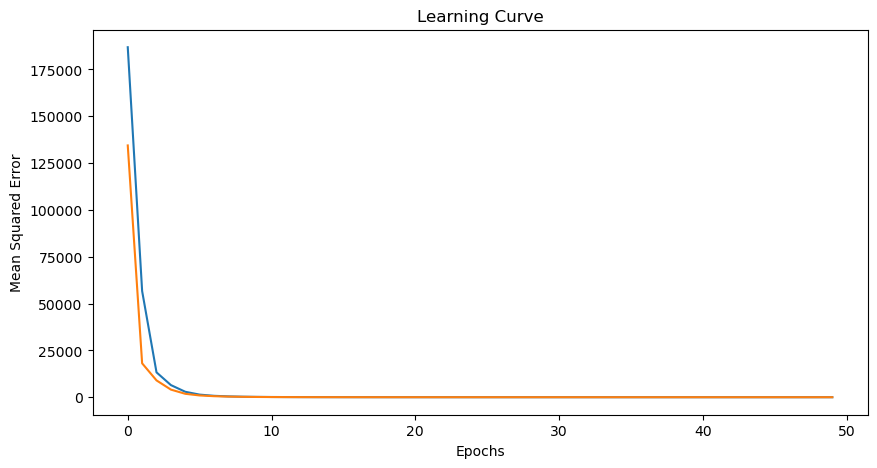

In [51]:
#plot the learing curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

In [52]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [53]:
ytrain.head()

,PE
8710,430.70
6198,449.88
1257,464.95
4643,449.03
8090,477.20


In [54]:
from sklearn.metrics import r2_score

In [55]:
tr_score=r2_score(ytrain,tr_pred)
ts_score=r2_score(ytest,ts_pred)

In [56]:
print(tr_score)
print(ts_score)

0.9284155964851379
0.9296327233314514
